## Salary Prediction

In [1]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
#import data
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Let us inspect the data:

In [4]:
data.shape

(30, 2)

We hardly have 30 data points.

In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Min years of experience is 1.1 with a salary of 27414.4 and max years of experience is 10.5 with a salary of 122391.

#### Let us visualise the data:

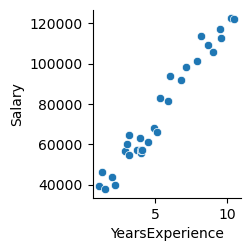

In [6]:
sns.pairplot(y_vars = 'Salary', x_vars = 'YearsExperience' ,data = data)

Salary looks linear related to years of experience.

In [7]:
# checking the correlation of the data
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


0.97 is highly correlated.

#### Data preparation:

In [8]:
X = data['YearsExperience']
y = data['Salary']

In [9]:
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [10]:
X_train.shape

(21,)

In [11]:
X_test.shape

(9,)

#### Model Building:

In [12]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

In [13]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           9.91e-14
Time:                        14:33:48   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.52e+04   2875.387     

R2, p value looks fine.

So our linear regression equation is :
#### Salary = 25200 + YearsExperience x9731.2038

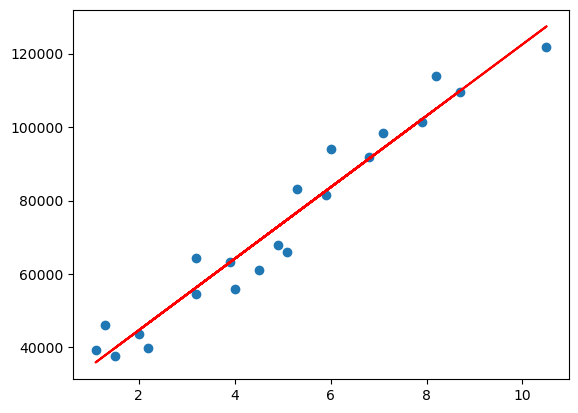

In [14]:
# Let us show the line fitting:
plt.scatter(X_train,y_train)
plt.plot(X_train, 25200 + X_train * 9731.2038,'r')
plt.show()

#### Residual analysis:

In [16]:
y_train_pred = model.predict(X_train_sm)

In [17]:
y_train_pred.head()

17     76778.268129
22    102079.398108
11     64127.703139
4      46611.536230
29    127380.528088
dtype: float64

In [19]:
residual = (y_train - y_train_pred)

In [20]:
residual.head()

17    6309.731871
22    -777.398108
11   -8333.703139
4    -6720.536230
29   -5508.528088
dtype: float64

In [21]:
sns.distplot(residual)

<AxesSubplot:ylabel='Density'>

Residual looks normally distributed.

In [22]:
sns.scatterplot(X_train,residual)

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

There is no pattern to residual.

#### Predictions on the test data:

In [23]:
X_test_sm = sm.add_constant(X_test)

In [24]:
y_pred = model.predict(X_test_sm)

#### Root mean squared error:

In [25]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

5505.479002176126

RMSE won't suggest anything as we do not have any model to compare.

#### R2 score:

In [26]:
r2_score(y_test,y_pred)

0.962766868547327

The model explains 96.27% of variance.

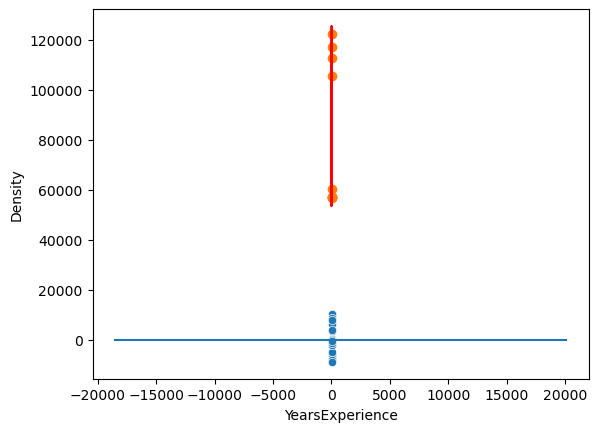

In [27]:
# Let us show the line fitting:
plt.scatter(X_test,y_test)
plt.plot(X_test, 25200 + X_test * 9731.2038,'r')
plt.show()